In [1]:
from src.data_utils import *
from src.strategy_utils import *

### Load wind data and calculate potential revenue

from wind_data.csv:
- Wind Speed (m/s)

using the power curve from power_curve.csv:
- Wind power (MW)

using the price from electricity_prices.csv:
- Revenue (Euros)


In [2]:
wind_df=generate_dataframe()
wind_df.head()

,Speed (m/s),Power (MW),Price (Eur/MWh),Revenue (Eur)
Timestamp (UTC),,,,
2015-01-01 00:00:00,15.000000,2.995786,27.36,81.964717
2015-01-01 01:00:00,15.842659,2.999288,27.24,81.700607
2015-01-01 02:00:00,13.332094,2.873903,27.16,78.055194
2015-01-01 03:00:00,14.732860,2.991441,27.15,81.217611
2015-01-01 04:00:00,16.436129,3.000000,27.30,81.900000


### Scheduled maintenance strategy Example

In this strategy we visit the turbine on a given day of the year every year

Pros : If the period is chosen wisely , the vessel will always be able to sail and the turbine never fails    
Cons : Can lead to many visits

Below an example of such a strategy

The revenue for the Scheduled Maintenance strategy is 2122254 Eur


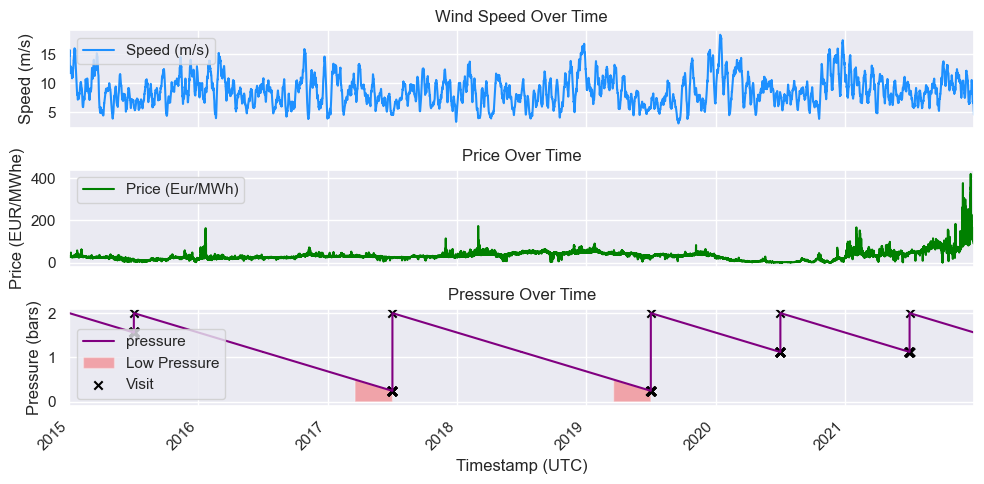

In [7]:
Strategy=ScheduledMaintenance(1,7)

wind_df=Strategy.add_downtimes(wind_df)
r=Strategy.calculate_revenue(wind_df)
print(f'The revenue for the {Strategy.name} strategy is {int(r)} Eur')
Strategy.plot_profiles(wind_df)


### Condition monitoring strategy example

This strategy triggers a visit when the pressure reaches a certain value

Pros: less vessel visits as we allow the pressure to drop more  
Cons: If the pressure specified is too low, there is a risk that the vessel cannot sail and the turbine fails, also the price is not considered here !

The condition monitoring strategy is used here for a "Run to failure" strategy where we visit the turbine when the pressure reaches the minimum pressure.

The revenue for the Condition Monitoring strategy is 2318758 Eur


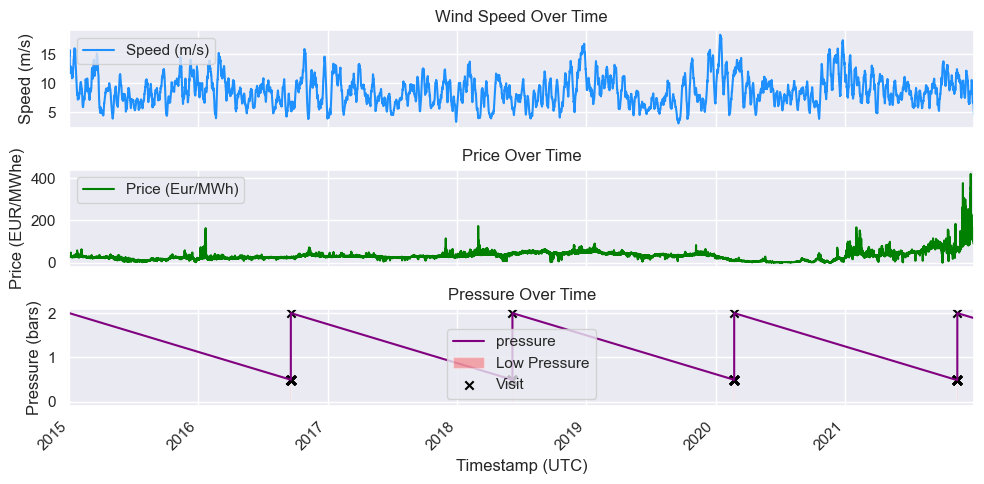

In [8]:
Strategy=ConditionMonitoring(0.5)

wind_df=Strategy.add_downtimes(wind_df)
r=Strategy.calculate_revenue(wind_df)
print(f'The revenue for the {Strategy.name} strategy is {int(r)} Eur')
Strategy.plot_profiles(wind_df)

### Create your own strategy

In [5]:
# This is a template for an empty Strategy class 
# Feel free to copy the classes for the scheduled and condition monitoring strategies in src/strategy_utils if you want to use them as a starting point

class CustomStrategy(MaintenanceStrategy):

    def __init__(self) -> None:
        super().__init__()
        self.name="Custom Strategy"
        
    def fix_pressure(self,current_pressure,current_time,current_wind_speed,current_price):

        # place your code here
        # should return True (= send vessel) or False

        return False

The revenue for the Custom Strategy strategy is 407149.9208129921


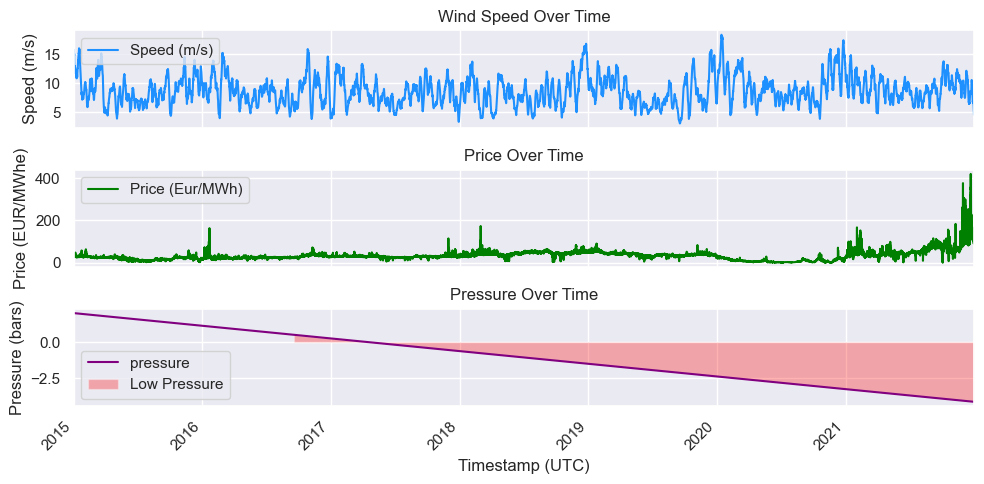

In [6]:
Strategy=CustomStrategy()
wind_df=Strategy.add_downtimes(wind_df)
r=Strategy.calculate_revenue(wind_df)

print(f'The revenue for the {Strategy.name} strategy is {r}')
Strategy.plot_profiles(wind_df)